# **Predicción de enfermedades con aprendizaje automático, a partir de información de sintomatología clínica**

##### Universidad Autónoma de Occidente
##### Facultad de Ingeniería
##### Curso: Aprendizaje Autómatico
##### Profesor: Victor Romero Cano
##### Integrantes: Miguel Angel Cycedo, Joseph David Gómez y Daniela Restrepo Galván 

# Introducción
En este proyecto, se construyó un regresor logístico con regularización tipo Ridge, para predecir el diagnóstico de 42 enfermedades (VER TABLA) de origen infeccioso, metabólico, agudo, crónico e inmunológico en función de un modelo de aprendizaje automático entrenado a con un regresor logístico. 

Este modelo de aprendizaje automático se entrenó con aproximadamente 3936 datos reunidos de una base de información de sintomatología clínica. El conjunto de datos está disponible públicamente en el repositorio Kaggle, en el siguiente enlace: https://www.kaggle.com/datasets/kaushil268/disease-predictionusing-machine-learning; dispone de 4920 muestras y 132 características de síntomas clínicos que abarcan desde dolores físicos hasta signos de comportamiento. 

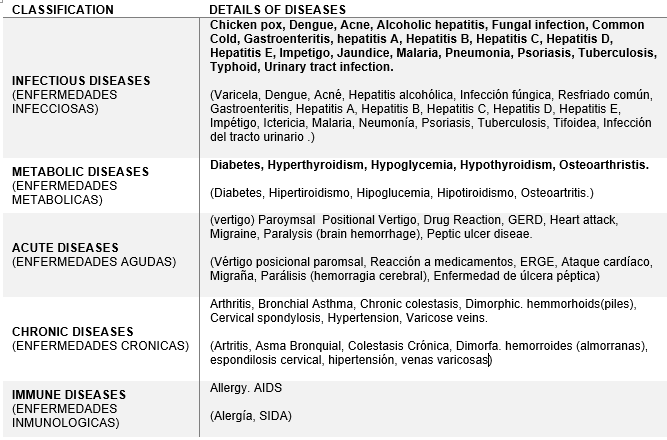


## **Tecnologías**

La aplicación `app.py` esta desarrollada en `Python`, mientras que la interfaz de usuario esta creada con `Streamlit`. Por otro lado, el modelo de aprendizaje automático fue diseñado usando el módulo `scikit-learn` y se implementaron algunas librerías como `pandas`, `numpy` and `polars`, para manipular y cargar los datos, crear y operar matrices multidimensionales.



## **Modelo en producción con servidor remoto**

El proyecto fue subido a la nube usando Microsoft Azure. Puede acceder al mismo con el siguiente enlace: https://djmdiseaseapp.australiasoutheast.cloudapp.azure.com:8080

# **1. Instalación scikit-learn**

In [ ]:
# Se instala la versión 0.24.1 de la librería scikit-learn
!pip install scikit-learn==0.24.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **2. Importación de librerías**

A continuación, se importan los módulos necesarios para manipular y cargar los datos del dataset, crear y operar matrices multidimensionales y visualizar los datos obtenidos. 

In [ ]:
# Se importa biblioteca para manipulación y análisis de datos para el lenguaje de programación Python (Pandas), 
# biblioteca para crear vectores y matrices con funciones matemáticas para operar (numpy) y bibliotecas para
# la generación de gráficos y visualización de datos (Matplotlib)(Seaborn).
import pandas as pd
import numpy as np

# Se importa de la libreria scikit-learn la funcion sklearn.model_selection.train_test_split para hacer una división aleatoria
# en conjuntos de datos de  entrenamiento y validación. 
from sklearn.model_selection import train_test_split

# Se importa de la librería scikit-learn la función sklearn.linear_model.Regresión Logística, que implementa un 
# clasificador de regresión logística.
from sklearn.linear_model import LogisticRegression

# Se importa de la librería scikit-learn la funcion sklearn.metrics.classification_report, a fin de obtener
# un informe de texto que muestre las principales métricas de clasificación.
from sklearn.metrics import classification_report

import pickle

In [ ]:
!python3 --version

Python 3.7.13


# **3. Carga de Dataset**

En esta sección, se importa y  se carga el dataset de entrenamiento/validación y de testeo, implementando la librería pandas para la manipulación de los mismos.

In [ ]:
#@title Lectura de Datos de Entrenamiento/Validación

# Lectura del conjunto de datos de entrenamiento y validación, dispuestos en valores separados por punto-coma "csv" para obtener un dataframe.
df=pd.read_csv("/content/Training_mod.csv", sep=';')

# Corroboración de datos del dataframe con las primeras n filas del objeto.
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
#@title Lectura de Datos de Prueba

# Lectura del conjunto de datos de testeo, dispuestos en valores separados por punto-coma "csv" para obtener un dataframe.
df_test=pd.read_csv("/content/Testing_mod.csv", sep=';')

# Corroboración de datos del dataframe con las primeras n filas del objeto.
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


# **4. Selección de Datos**

En esta sección, se extraen las variables independientes del conjunto de datos y se guardan en una matriz "X" y la variable dependiente(target) se carga en una matriz "Y". Posterior a ello, se divide el dataset en dos partes: datos para entrenamiento y datos para validar el modelo.

In [ ]:
#@title Selección de variables independientes y variable dependiente del conjunto de datos de entrenamiento/validación

# Se extraen los datos de las variables independientes del dataframe de entrenamiento/validación.
X=df.iloc[:,0:132]

# Se extrae el target del dataframe de entrenamiento/validación.
Y=df.iloc[:,132]

In [ ]:
#@title Selección de variables independientes y variable dependiente del conjunto de datos de prueba

# Se extraen los datos de las variables independientes del dataframe de entrenamiento/validación.
x_test=df_test.iloc[:,0:132]

# Se extrae el target del dataframe de prueba. 
y_test=df_test.iloc[:,132]

In [ ]:
#@title Selección de Datos para entrenamiento y validación del modelo

# Se divide el dataset en subconjuntos aleatorios de entrenamiento y validación. En este sentido, se define el 20 % de los datos 
# originales para el conjunto de datos de validación.
x_train,x_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,random_state=42)

# **4. Ajuste del modelo Regresor Logístico** 

En esta sección, se crea, se entrena y se graba el modelo en un archivo pkl. 

In [ ]:
# Se instancia los parametros del modelo de regresión lógitica con regularización tipo Ridge y se entrena el modelo.
Logit_norm=LogisticRegression(C=11.1111111111111112,solver='liblinear',penalty="l2").fit(x_train,y_train)


In [ ]:
# Se graba el modelo en el directorio
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(Logit_norm, file)

In [ ]:
# Se carga el modelo
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

# **5. Desempeño del modelo**

En esta sección, se mide el desempeño del modelo de regresión logística con regularización tipo Ridge, con los datos de entrenamiento y validación. 

In [ ]:
# Se crea un objeto con los resultados de las predicciones de los datos de entrenamiento. 
predictlogit_norm_train=model.predict(x_train)

# Se crea un objeto con los resultados de las predicciones de los datos de validación. 
predictlogit_norm_test=model.predict(x_val)

# Se imprime el informe con las principales métricas de clasificación de las predicciones obtenidas por el 
# regresor logístico con regularización tipo Ridge, a partir de los datos de entrenamiento y los datos de validación.
print("datos de validación \n",classification_report(y_val,predictlogit_norm_test))
print("datos de entrenamiento \n",classification_report(y_train,predictlogit_norm_train))

datos de validación 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
     

# **6. Desempeño del modelo con muestras nuevas**

En esta sección, se mide el desempeño del modelo de regresión logística con regularización tipo Ridge, con los datos de prueba. 

In [ ]:
# Se crea un objeto con los resultados de las predicciones de los datos de prueba 
predictest=model.predict(x_test)

# Se imprime el informe con las principales métricas de clasificación de las predicciones obtenidas por el 
# regresor logístico con regularización tipo Ridge, a partir de los datos de prueba
print("datos de validación \n",classification_report(y_test,predictest))

datos de validación 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
     